# Exploratory Data Analysis (EDA)
___
Mr. Pravin Baste
___

- Pandas profiling
- SweetViz
- Pandas Visual analysis
- Dtale


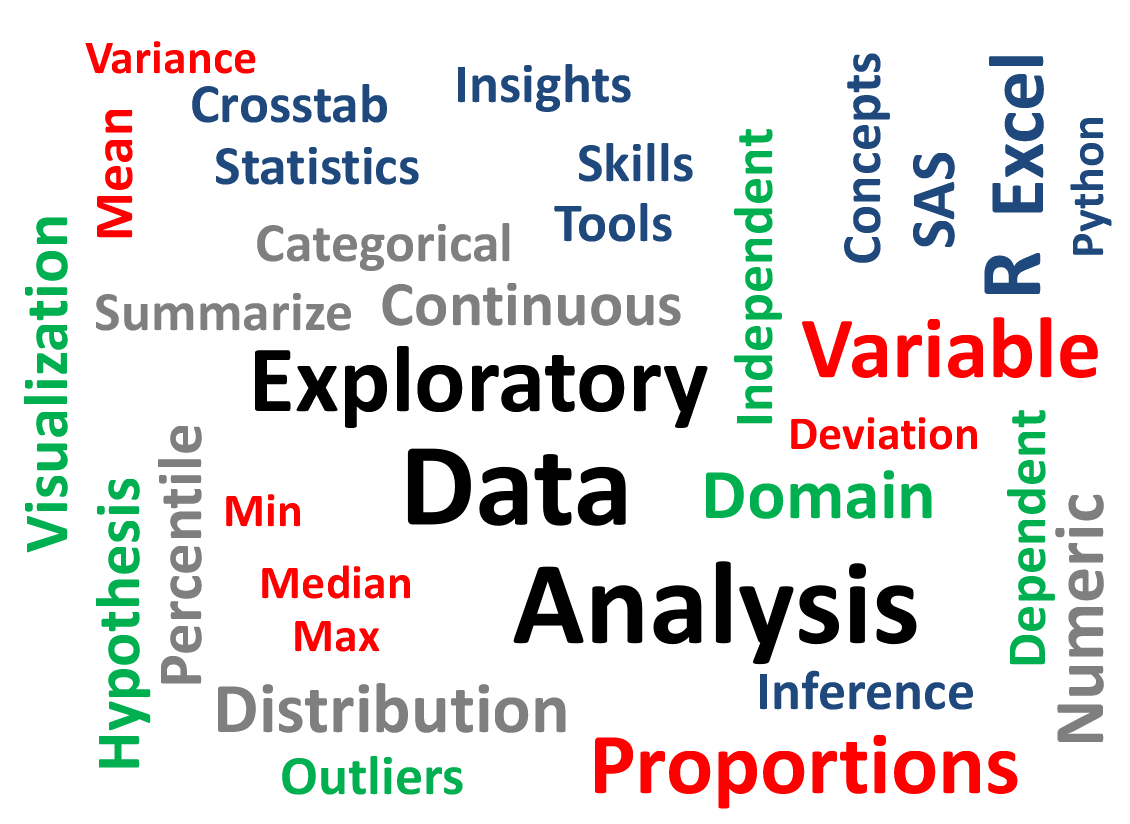

___
**Agenda**
___
- What is Exploratory Data Analysis ?
- What is the Objective of EDA ?
- Steps Involved in Exploratory Data Analysis ?

**What is Exploratory Data Analysis ?**
___
Exploratory data analysis or EDA is nothing data exploration techniques to understand the various aspect of data.
___
**What is the Objective of EDA ?**
___
It is basically used to filter the data from redundancies.
___
**Steps Involved in Exploratory Data Analysis ?**
___
It follows a systematic set of steps to explore the data in the most efficint way possible.
 STEPS
 - Understand the Data
 - Clean the data
 - Analysis of Relationships between variable

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp 

In [2]:
data=pd.read_csv('students.csv')

In [31]:
# 1 understanding the data

In [32]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [34]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
data.shape

(1000, 8)

In [36]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [37]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [38]:
# to check specific columns
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [39]:
# cleaning the data

In [40]:
# check for null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [41]:
# droping redundant data
student = data.drop(['race/ethnicity','parental level of education'],axis=1)

In [42]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [43]:
#3 realationship analysis

In [44]:
corelation =student.corr()

<AxesSubplot:>

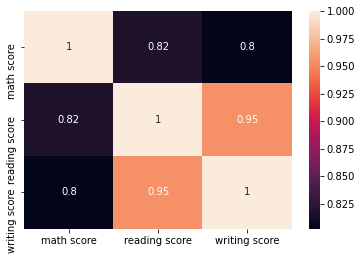

In [45]:
sns.heatmap(corelation,xticklabels=corelation,yticklabels=corelation.columns,annot=True)

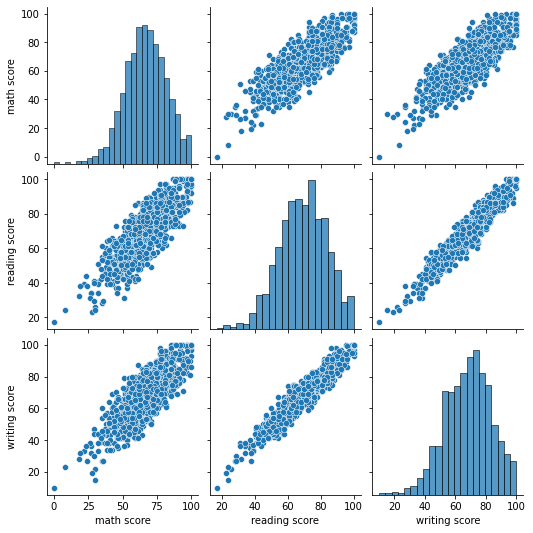

In [46]:
sns.pairplot(student)

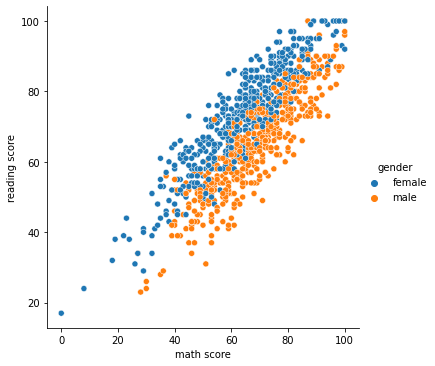

In [47]:
sns.relplot(x='math score', y='reading score', hue='gender',data=student)

C:\Users\pravi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

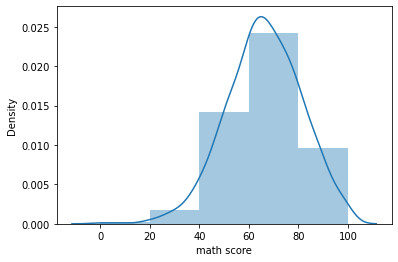

In [48]:
sns.distplot(student['math score'],bins=5)

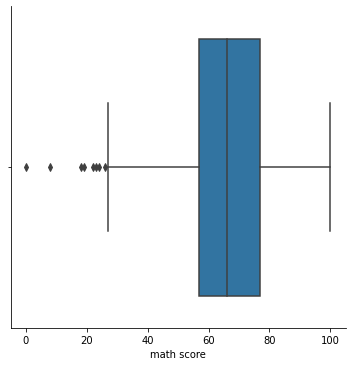

In [49]:
sns.catplot(x='math score', kind='box', data=student)

## EDA using Pandas_profiling

In [52]:
import pandas_profiling as pp 

In [51]:
# forming dataframe and printing 
data = pd.DataFrame(student) 
print(data) 
  
# forming ProfileReport and save 
# as output.html file 
profile = pp.ProfileReport(data) 
profile.to_file("output.html")
# we will get the output in HTML


     gender         lunch test preparation course  math score  reading score  \
0    female      standard                    none          72             72   
1    female      standard               completed          69             90   
2    female      standard                    none          90             95   
3      male  free/reduced                    none          47             57   
4      male      standard                    none          76             78   
..      ...           ...                     ...         ...            ...   
995  female      standard               completed          88             99   
996    male  free/reduced                    none          62             55   
997  female  free/reduced               completed          59             71   
998  female      standard               completed          68             78   
999  female  free/reduced                    none          77             86   

     writing score  
0               74

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# SweetViz

In [54]:
import sweetviz as sv

In [55]:
my_report = sv.analyze(student)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# PANDAS VISUAL ANALYSIS

In [6]:
# we will performe operation on available data in sear=born library

In [8]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [9]:
df=sns.load_dataset('iris')

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
from pandas_visual_analysis import VisualAnalysis

In [25]:
VisualAnalysis(df)

# Dtale

In [1]:
# lets use dataset availble in seaborn
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
df=sns.load_dataset('planets')

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
# lets use the dtale for that we are importing dtale
import dtale

In [6]:
dtale.show(df)

2021-04-05 09:48:26,371 - INFO     - NumExpr defaulting to 8 threads.


C:\Users\pravi\Anaconda3\lib\site-packages\dtale\views.py:1672: FutureWarning:

The default value of regex will change from True to False in a future version.

